In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [10]:
# data 
df =pd.read_csv('../artifacts/application_train.csv')
df.drop('SK_ID_CURR', inplace=True , axis=1)
df.shape

(307511, 121)

In [11]:
# analysing with target column
df['TARGET'].value_counts()



TARGET
0    282686
1     24825
Name: count, dtype: int64

there is class imbalance  in our provided  data set 
defaulter=>7k approx and non_defaulter aroun 84k

In [12]:
# lets start with numerical cols 
numerical_cols= [cols for cols in df.columns if df[cols].dtypes!='O']
categorical_cols=[cols for cols in df.columns if df[cols].dtypes!='O']

In [5]:
# plotting the  kde plot for all numerical cols 
# to understand the  variance ,  skewness 
plt.figure(figsize=(30,350))
j=1
for i in numerical_cols:
   plt.subplot(40 , 3, j)
   sns.kdeplot(df[i])
   plt.title(i)
   j+=1


plt.show()

 the cols like AMT_REQ_bureas_MOn , Qrt  ,week,day,hour , flag documnet 1-20,obs,def , Non ;living modes, flag ,reg ,mobil
 these type data groups have very less variance  bym athematically and practiaccllly thes are no use so we safely assume that we can drop thes cols 

In [13]:

# it says how many Number of enquiries to Credit Bureau about the client before application	
# since it can be import info   rather than removing we can make a single column form it 
AMT_cols=[cols for cols in df.columns if cols.startswith("AMT_REQ_")]
df["AMT_REQ"]=0
for col in AMT_cols:
   df[col].fillna(0, inplace=True)
   df["AMT_REQ"]+=df[col]
df.drop(AMT_cols, inplace=True, axis=1)



C:\Users\KADAK SINGH\AppData\Local\Temp\ipykernel_9892\264377550.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


In [16]:
flag=[cols for cols in df.columns if cols.startswith("FLAG_DOC")]
# these cols represnet whetehr the client provides thes documnet on time appilcation or not 
numerical_cols= [cols for cols in df.columns if df[cols].dtypes!='O']
a=df[numerical_cols].corr()['TARGET']


np.int64(0)

In [17]:
for i in flag:
   print(i , a[i]) 

# hence form mathematically checking out varaince by plotting and correlation with target we can safely remove this cols
df.drop(flag,inplace=True, axis=1)

FLAG_DOCUMENT_2 0.005417144279619328
FLAG_DOCUMENT_3 0.044346346851144976
FLAG_DOCUMENT_4 -0.0026720821701620937
FLAG_DOCUMENT_5 -0.00031577741664638075
FLAG_DOCUMENT_6 -0.02860189397306156
FLAG_DOCUMENT_7 -0.0015195031600879073
FLAG_DOCUMENT_8 -0.00804038446605664
FLAG_DOCUMENT_9 -0.004352408580842042
FLAG_DOCUMENT_10 -0.0014138915975241474
FLAG_DOCUMENT_11 -0.004229349652160023
FLAG_DOCUMENT_12 -0.0007557507043578883
FLAG_DOCUMENT_13 -0.01158322234141947
FLAG_DOCUMENT_14 -0.009463821935576941
FLAG_DOCUMENT_15 -0.006535657584094894
FLAG_DOCUMENT_16 -0.011614671588293178
FLAG_DOCUMENT_17 -0.0033775691474138337
FLAG_DOCUMENT_18 -0.007952385099462259
FLAG_DOCUMENT_19 -0.001357518324300817
FLAG_DOCUMENT_20 0.00021539355797734155
FLAG_DOCUMENT_21 0.003708625029306583


In [23]:
# it represents how many friends or family are late for days past due
# the correl is less than 1% but the in practicall scenario we know that the client can be highly influnve by his surrounding 
# so we are making a  coloumn from both the fetures 
# there is def feature which indicate the how many people out of them were defaulter 
obs=[cols for cols in df.columns if cols.startswith("OBS")]
j=0

for i in obs:
    print(i,a[i])


defaulter=[cols for cols in df.columns if cols.startswith('DEF')]

for i in defaulter:
    print(i,a[i])

# so we can make ratio out of that for overall 90 days we assuming that 60 days is excluding out of 30 days 

df['R_O_Def_OBS']=df['DEF_60_CNT_SOCIAL_CIRCLE']/df['OBS_60_CNT_SOCIAL_CIRCLE']+df['DEF_30_CNT_SOCIAL_CIRCLE']/df['OBS_30_CNT_SOCIAL_CIRCLE']

df['R_O_Def_OBS']
# for this feature assuming mean for nan can be dangerous so we would impute zero rather than mean with a flag 
df['flag_R_O_Def_OBS'] = df['R_O_Def_OBS'].apply(lambda x: 1 if pd.isna(x) else 0)






OBS_30_CNT_SOCIAL_CIRCLE 0.0091306657027761
OBS_60_CNT_SOCIAL_CIRCLE 0.009022143630215059
DEF_30_CNT_SOCIAL_CIRCLE 0.03224757925304534
DEF_60_CNT_SOCIAL_CIRCLE 0.031276472126435764


In [26]:
df['R_O_Def_OBS']=round(df['R_O_Def_OBS'],0)

df['R_O_Def_OBS'].fillna(0, inplace=True)

C:\Users\KADAK SINGH\AppData\Local\Temp\ipykernel_9892\3381559540.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['R_O_Def_OBS'].fillna(0, inplace=True)


In [28]:
# since these indicate personal info so removing all 
contacts=[cols for cols in df.columns if cols.startswith("FLAG_")]
df.drop(contacts ,axis=1 , inplace=True)


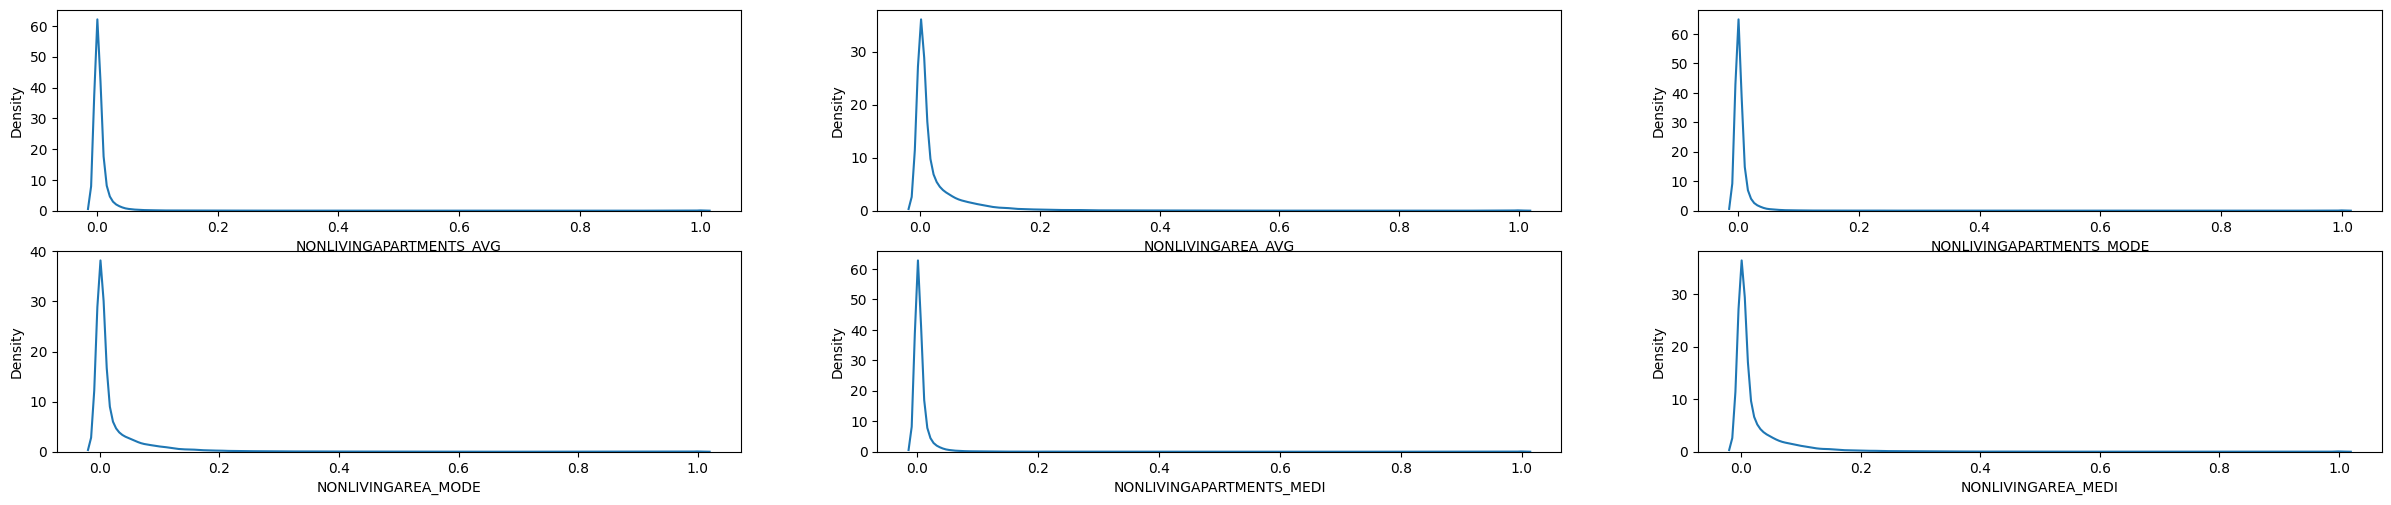

In [29]:
NON_LIVING_COL=[cols for cols in df.columns if cols.startswith("NONLIVING")]
j=0
plt.figure(figsize=(3*10 , 4*3))
for i in NON_LIVING_COL:
    plt.subplot(4,3,j+1)
    sns.kdeplot(df[i])
    j+=1



In [34]:
for i in NON_LIVING_COL:
    print(i,a[i])

df.drop(NON_LIVING_COL , inplace=True, axis=1)


Region=[cols for cols in df.columns if cols.startswith("REG_REGION_NOT_")]


NONLIVINGAPARTMENTS_AVG -0.0031761075207260804
NONLIVINGAREA_AVG -0.013578069781984715
NONLIVINGAPARTMENTS_MODE -0.0015565608459037154
NONLIVINGAREA_MODE -0.012710543748878284
NONLIVINGAPARTMENTS_MEDI -0.0027571486021083394
NONLIVINGAREA_MEDI -0.013336719980273937


In [64]:
df['Region_sum']=((df['REG_REGION_NOT_WORK_REGION']+df['REG_REGION_NOT_LIVE_REGION'])/2)

df.groupby('Region_sum')['TARGET'].value_counts()

df.drop(Region , inplace=True , axis=1)

In [ ]:
# # oultier capping /cant ues this most of features are binary 
# TARGET=df['TARGET']
# df.drop("TARGET" , inplace=True , axis=1)
# for cols in  df.columns :
#            if(df[cols].dtypes !="O"):
#             IQR=df[cols].quantile(.75)- df[cols].quantile(.25)
#             UL=1.5*IQR +df[cols].quantile(.75)
#             LL=df[cols].quantile(.25)-1.5*IQR

#             df[cols] =df[cols].apply(lambda x: UL if x > UL else x)
#             df[cols]=df[cols].apply(lambda x:LL if x<LL else x)


# df['TARGET']=TARGET
# numerical_cols=[cols for cols in df.columns if df[cols].dtypes!='O']

In [67]:

numerical_cols=[cols for cols in df.columns if df[cols].dtypes!='O']
# plt.figure(figsize=(3*5, len(numerical_cols)*10))
# j=0
# for col in numerical_cols:
#     plt.subplot(len(numerical_cols), 3 ,j+1)
#     sns.boxplot(df[col])
#     j+=1

len(numerical_cols )

69

In [90]:
print(df.groupby('NAME_TYPE_SUITE')['TARGET'].value_counts())
df['TARGET'].value_counts()

# we can  clear see that a person who came with family has the high chance pay back loan comapre to thers 


# u can Lable code  chidren family group of people as 2 other A and othe b as 1 ands unaccompanied as 0

df['NAME_TYPE_SUITE'].replace({'Unaccompanied':int(0) , 'Other_A':int(1) , 'Family':int(2) , 'Other_B':int(1) , 'Spouse, partner':int(2) , 'Children':int(2)}, inplace=True)


NAME_TYPE_SUITE  TARGET
0                0         229411
                 1          20407
1                0           2386
                 1            250
2                0          50641
                 1           4145
Group of people  0            248
                 1             23
Name: count, dtype: int64


ValueError: invalid literal for int() with base 10: 'Working'

In [91]:
df['RlRAG']=df['AMT_CREDIT']/df['AMT_GOODS_PRICE']

df['loan/anual_salary']=df['AMT_CREDIT']/df['AMT_ANNUITY']

numerical_cols=[cols for cols in df.columns if df[cols].dtypes!='O']
df[numerical_cols].corr()['TARGET']["loan/anual_salary"]

np.float64(-0.032101516837308025)

EDA ANALYSIS

In [92]:
categorical_data=[col for col in df.columns if df[col].dtype=="O"]
df['NAME_TYPE_SUITE'].fillna(0, inplace=True)
df['NAME_TYPE_SUITE'].value_counts()

C:\Users\KADAK SINGH\AppData\Local\Temp\ipykernel_9892\1575607647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_TYPE_SUITE'].fillna(0, inplace=True)


NAME_TYPE_SUITE
0                  249818
2                   54786
1                    2636
Group of people       271
Name: count, dtype: int64

UNIVARIATE ANALYSIS

In [93]:
df['CODE_GENDER'].value_counts()

df.groupby("TARGET")['CODE_GENDER'].value_counts()

# IT SEEN THAT FEMALE % ARE IN DEFAULTER LIS is high COMPARE TO MEN


TARGET  CODE_GENDER
0       F              188278
        M               94404
        XNA                 4
1       F               14170
        M               10655
Name: count, dtype: int64

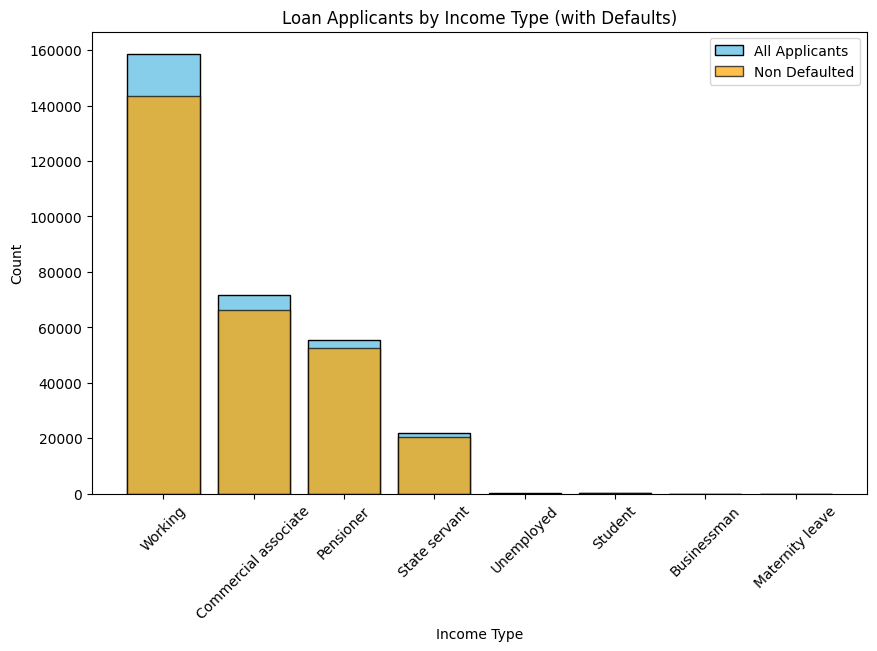

In [95]:
import matplotlib.pyplot as plt

# Count income types once
import matplotlib.pyplot as plt

# Total applicants by income type
profession = df['NAME_INCOME_TYPE'].value_counts()

# Applicants with TARGET=1 (defaulted)
profession_1 = df[df['TARGET'] == 0]['NAME_INCOME_TYPE'].value_counts()

# Align both on the same index
all_index = profession.index
values_total = [profession.get(i, 0) for i in all_index]
values_defaulted = [profession_1.get(i, 0) for i in all_index]

# Plot overlapping bars
plt.figure(figsize=(10,6))
plt.bar(all_index, values_total, color='skyblue', edgecolor='black', label='All Applicants')
plt.bar(all_index, values_defaulted, color='orange', edgecolor='black', label='Non Defaulted', alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Loan Applicants by Income Type (with Defaults)')
plt.legend()
plt.show()



([0, 1, 2, 3, 4],
 [Text(0, 0, 'Secondary / secondary special'),
  Text(1, 0, 'Higher education'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

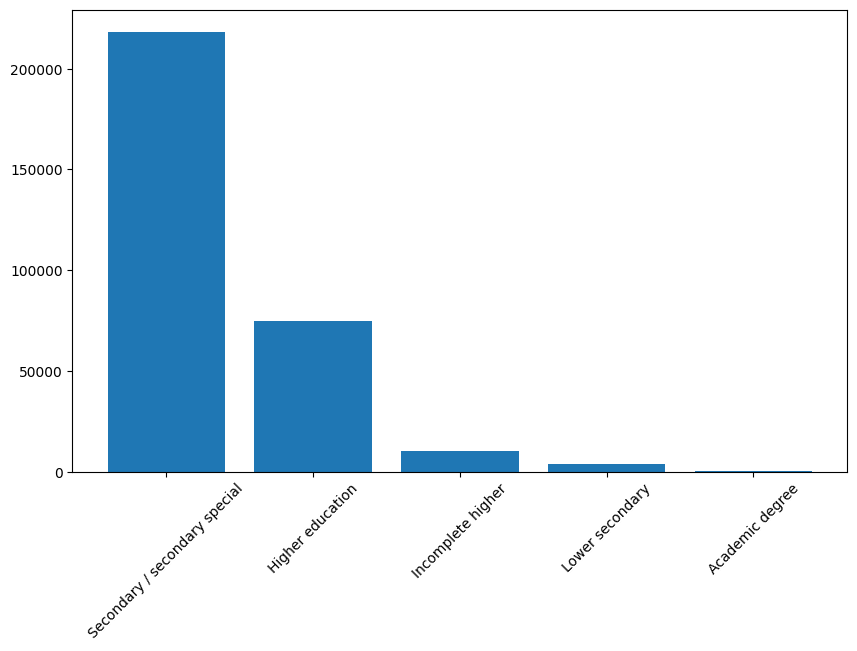

In [96]:
plt.figure(figsize=(10,6))
plt.bar(df['NAME_EDUCATION_TYPE'].value_counts().index, df['NAME_EDUCATION_TYPE'].value_counts())
plt.xticks(rotation=45)

NAME_HOUSING_TYPE
House / apartment       7.795711
With parents           11.698113
Municipal apartment     8.539748
Rented apartment       12.313051
Office apartment        6.572411
Co-op apartment         7.932264
Name: count, dtype: float64

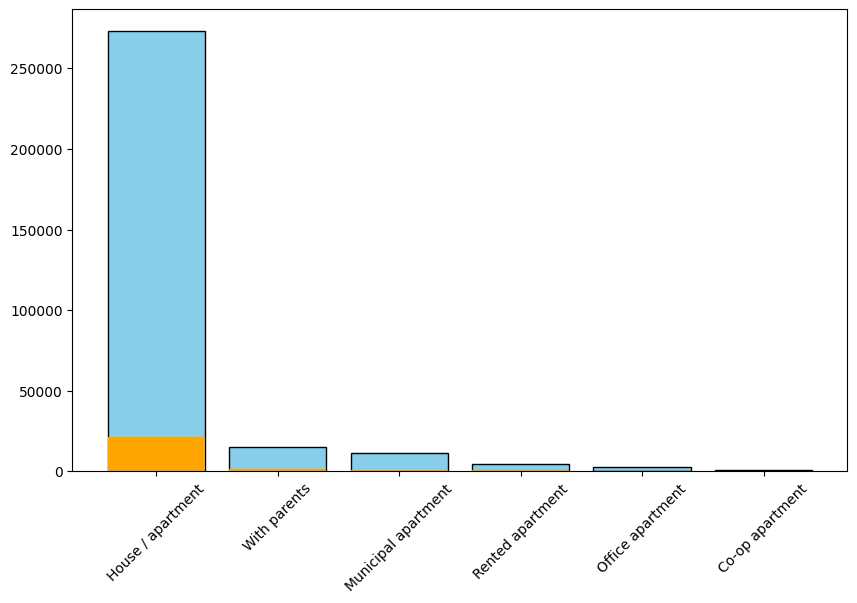

In [97]:
df['NAME_HOUSING_TYPE'].value_counts()



plt.figure(figsize=(10,6))
plt.bar(df['NAME_HOUSING_TYPE'].value_counts().index, df['NAME_HOUSING_TYPE'].value_counts(), color='skyblue', edgecolor='black',)
plt.bar(df['NAME_HOUSING_TYPE'].value_counts().index,df[df['TARGET']==1]['NAME_HOUSING_TYPE'].value_counts(), color='orange')


plt.xticks(rotation=45)


(df[df['TARGET']==1]['NAME_HOUSING_TYPE'].value_counts()/df['NAME_HOUSING_TYPE'].value_counts())*100

In [98]:
df['EMERGENCYSTATE_MODE'].isnull().sum()/df.shape[0]
# removing col due to hig null values

np.float64(0.47398304450897694)

In [99]:
df['WALLSMATERIAL_MODE'].isnull().sum()/df.shape[0]

np.float64(0.508407829313423)

In [100]:
df['FONDKAPREMONT_MODE'].isnull().sum()/df.shape[0]

np.float64(0.6838617155158677)

In [101]:
df.drop(['EMERGENCYSTATE_MODE','FONDKAPREMONT_MODE' ,'WALLSMATERIAL_MODE'] , inplace=True , axis=1)
# it consist of very high nul values 

In [102]:

def group(name, organization):
    if name.startswith(organization):
        # Extract number from the end of the string
        digits = ''.join(filter(str.isdigit, name))
        if digits:
            num = int(digits)
            if num > 10:
                return f'{organization} tier 3'
            elif num > 5:
                return f'{organization} tier 1'
            else:
                return f'{organization} tier 2'
    return name

df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: group(x, "Trade"))
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: group(x, "Business Entity"))
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: group(x, "Industry"))
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: group(x, "Transport"))




df['ORGANIZATION_TYPE'].value_counts()
# we can make an other row which flag  that we know whetr it belongs to any type 

ORGANIZATION_TYPE
Business Entity tier 2    84529
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Government                10404
Transport tier 2           8990
School                     8893
Trade tier 1               8462
Kindergarten               6880
Construction               6721
Industry tier 2            6251
Trade tier 2               5853
Industry tier 1            4920
Security                   3247
Industry tier 3            3140
Housing                    2958
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Postal                     2157
Security Ministries        1974
Restaurant                 1811
Services                   1575
University                 1327
Hotel                       966
Electricity                 950
Insurance                   597
Telecom                     577
Emergency             

<Axes: xlabel='count', ylabel='ORGANIZATION_TYPE'>

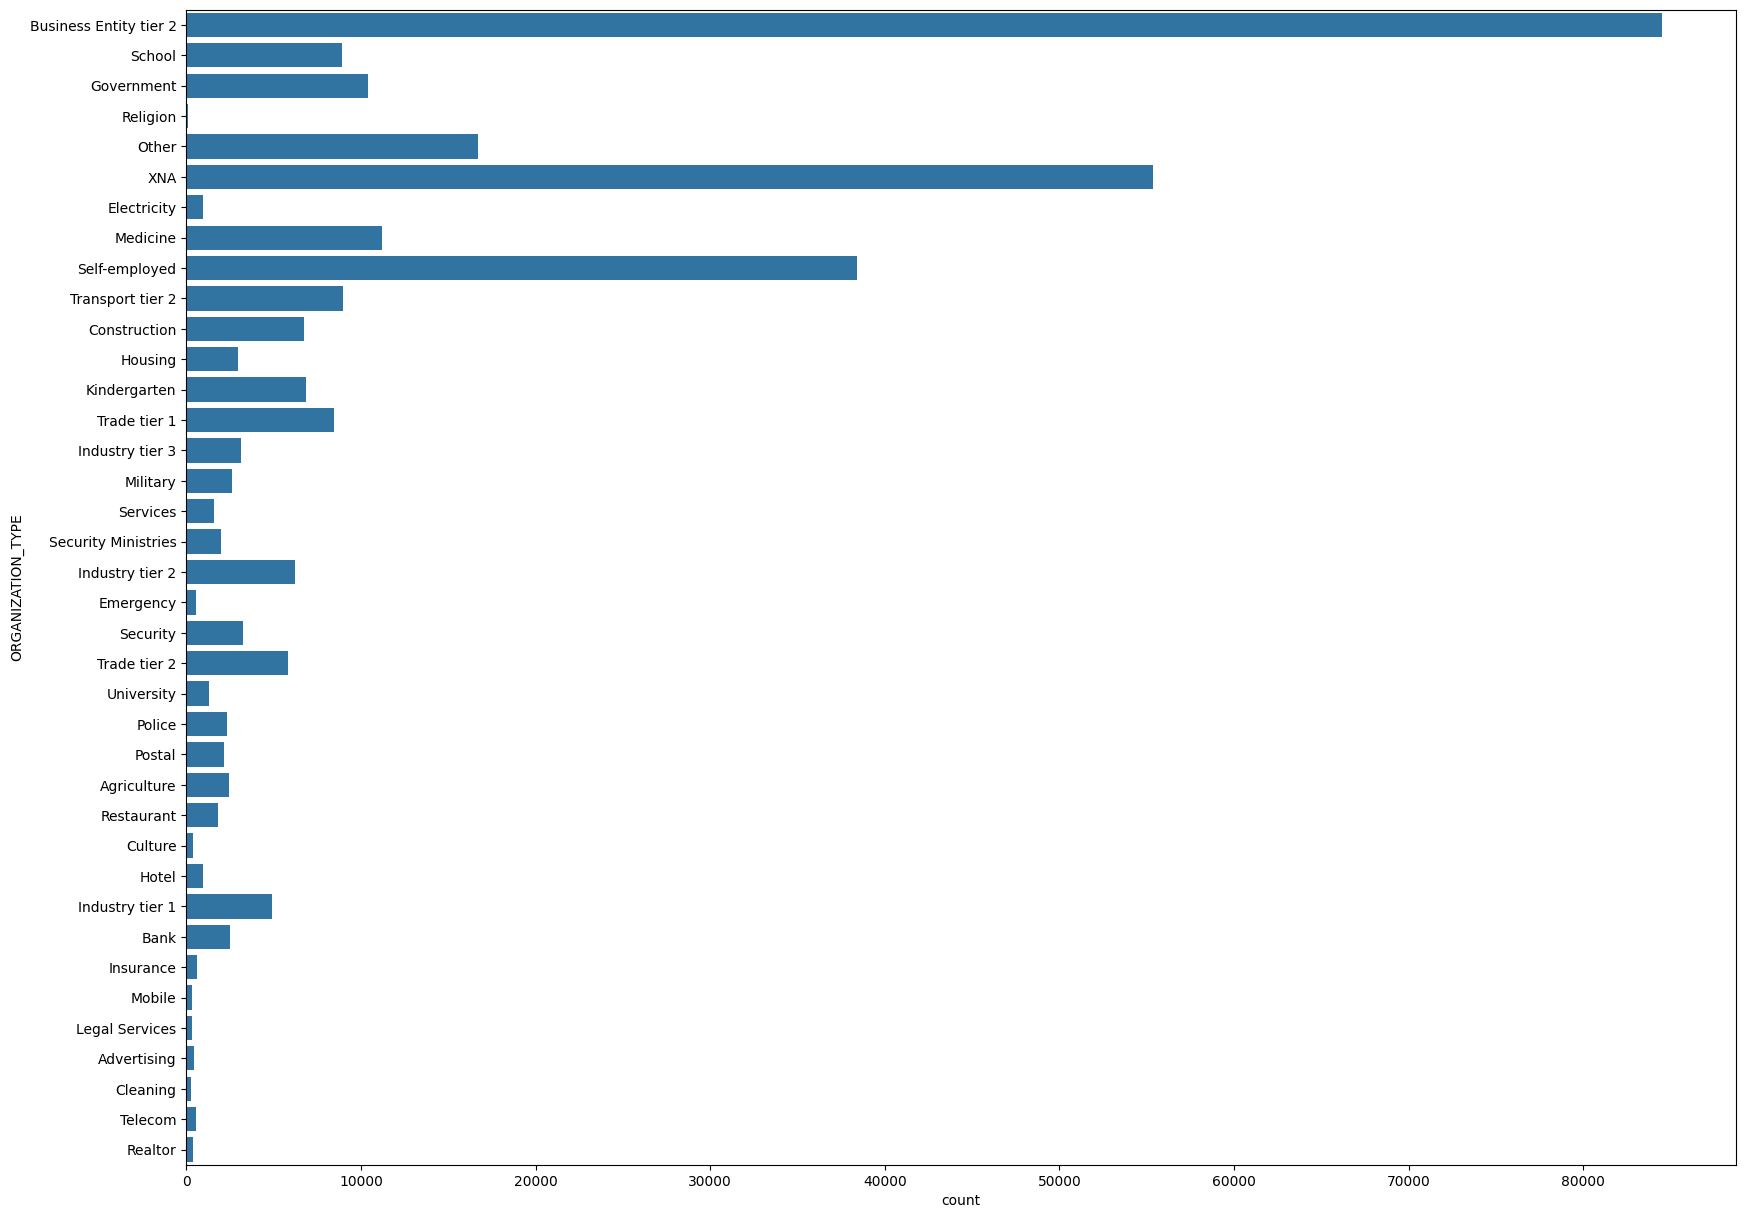

In [103]:
df['ORGANIZATION_TYPE'].value_counts()
plt.figure(figsize=(20,15))

sns.countplot(df['ORGANIZATION_TYPE'])

In [104]:
df['flag_organization']=[0 if x == 'XNA' else 1 for x in df['ORGANIZATION_TYPE']]

df['flag_organization']
# to learn the modle that XNA is not an organisation it is an misssing value 

0         1
1         1
2         1
3         1
4         1
         ..
307506    1
307507    0
307508    1
307509    1
307510    1
Name: flag_organization, Length: 307511, dtype: int64

In [105]:
categorical_data

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [106]:
df=df[df['NAME_FAMILY_STATUS']!='Unknown']
df['NAME_FAMILY_STATUS'].value_counts()
# can categorize married and civi marriage as 1 and other as 0
df['NAME_FAMILY_STATUS'].apply(lambda x : 1 if x in ['Married','Civil marriage' ] else 0)  #write in production not now 

0         0
1         1
2         0
3         1
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    1
Name: NAME_FAMILY_STATUS, Length: 307509, dtype: int64

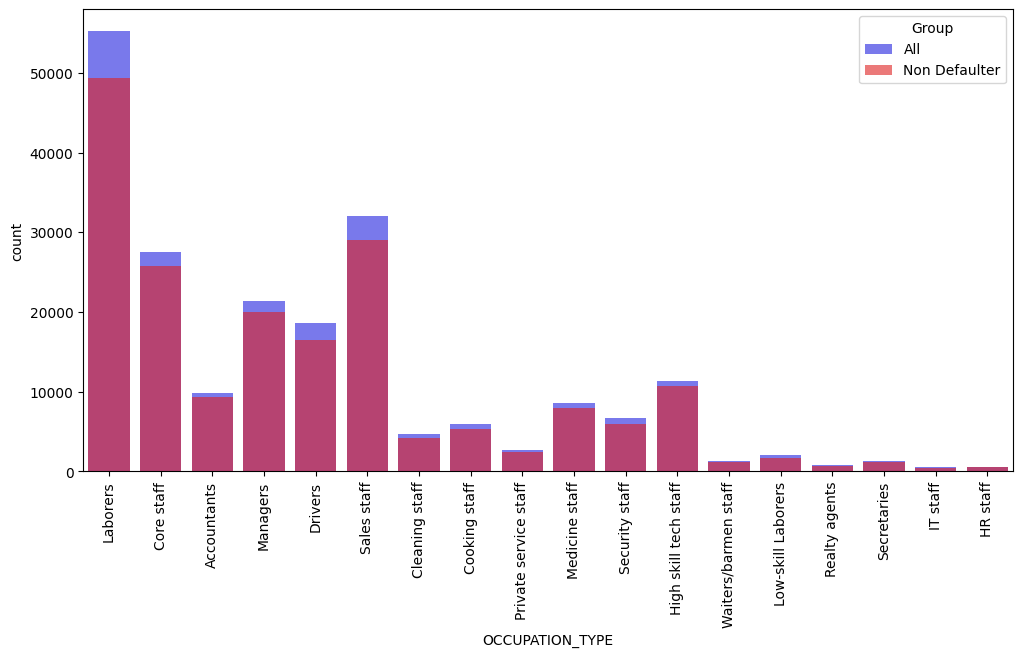

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot both distributions with labels
sns.countplot(x=df['OCCUPATION_TYPE'], label='All', color='blue', alpha=0.6)
sns.countplot(x=df.loc[df["TARGET"] == 0, "OCCUPATION_TYPE"], label='Non Defaulter', color='red', alpha=0.6)

# Add legend and formatting
plt.legend(title='Group')
plt.xticks(rotation=90)

plt.show()

# it seen that the Accountant and waiters are highle defaulter 

In [109]:
df['WEEKDAY_APPR_PROCESS_START']
# there is no relation b/w will he pay laon or not on basis of the which day appication satrted so remving thsi col also
df.drop('WEEKDAY_APPR_PROCESS_START',inplace=True , axis=1)

In [110]:
categorical_data=[i for i in df.columns if df[i].dtype=='O']
df[categorical_data]


NAME_CONTRACT_TYPE CODE_GENDER NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0              Cash loans           M               0               Working   
1              Cash loans           F               2         State servant   
2         Revolving loans           M               0               Working   
3              Cash loans           F               0               Working   
4              Cash loans           M               0               Working   
...                   ...         ...             ...                   ...   
307506         Cash loans           M               0               Working   
307507         Cash loans           F               0             Pensioner   
307508         Cash loans           F               0               Working   
307509         Cash loans           F               0  Commercial associate   
307510         Cash loans           F               0  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE OCCUPATION_TYPE       ORGANIZATION_TYPE  \
0       House / apartment        Laborers  Business Entity tier 2   
1       House / apartment      Core staff                  School   
2       House / apartment        Laborers              Government   
3       House / apartment        Laborers  Business Entity tier 2   
4       House / apartment      Core staff                Religion   
...                   ...             ...                     ...   
307506       With parents     Sales staff                Services   
307507  House / apartment             NaN                     XNA   
307508  House / apartment        Managers                  School   
307509  House / apartment        Laborers  Business Entity tier 2   
307510  House / apartment        Laborers  Business Entity tier 2   

        HOUSETYPE_MODE  
0       block of flats  
1       block of flats  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
307506  block of flats  
307507  block of flats  
307508  block of flats  
307509  block of flats  
307510  block of flats  

[307509 rows x 10 columns]

In [111]:
df['NAME_CONTRACT_TYPE'].value_counts()
df.loc[df['TARGET'] == 1, 'NAME_CONTRACT_TYPE'].value_counts()/df['NAME_CONTRACT_TYPE'].value_counts()




NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054787
Name: count, dtype: float64

In [112]:
df['NAME_TYPE_SUITE'].value_counts() 
# theres is not mathematical relation that a person accompanied with will affect on result  but pyschological it may affect but our model only know maths hence it would ok to remove this column 
# strong point which confirms to remove is most of them wer unaccompanied hence no varaicne can be captured
df.drop('NAME_TYPE_SUITE',inplace=True ,axis=1)

In [113]:
categorical_data=[i for i in df.columns if df[i].dtype=='O']
categorical_data

df['HOUSETYPE_MODE'].isnull().sum()/ df.shape[0]

# it ok to remove the Houstpe_mode sicne 2 reasons there is no direct affetc of whic type of house he leaves and otehr to much null values ,

df.drop(['HOUSETYPE_MODE'], inplace=True , axis=1)

In [114]:
categorical_data=[i for i in df.columns if df[i].dtype=='O']
categorical_data

# feature engineering is done for categporcial cols 

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

<Axes: xlabel='CODE_GENDER'>

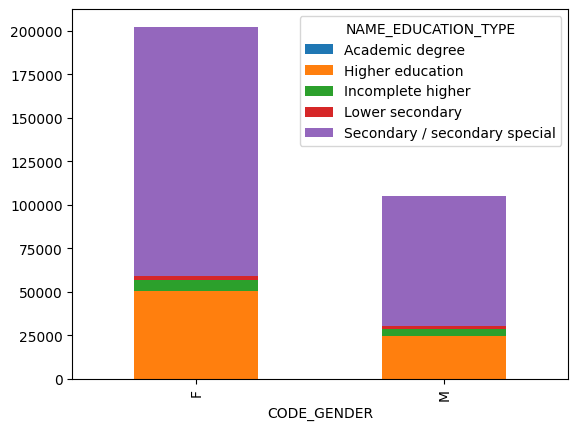

In [115]:
df=df[df['CODE_GENDER']!='XNA']

ct = pd.crosstab(df['CODE_GENDER'], df['NAME_EDUCATION_TYPE'])
ct.plot(kind='bar', stacked=True)

# generally the applicants have complete Secondaar 

<Axes: xlabel='NAME_EDUCATION_TYPE'>

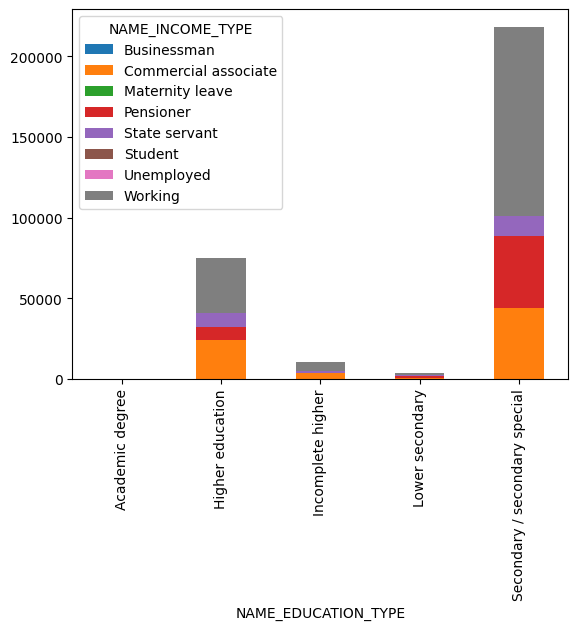

In [116]:
ct = pd.crosstab(df['NAME_EDUCATION_TYPE'], df['NAME_INCOME_TYPE'])
ct.plot(kind='bar', stacked=True)


In [117]:
# Numerical data 

numerical_cols=[i for i in df.columns if df[i].dtype!='O']
numerical_cols

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'APARTM

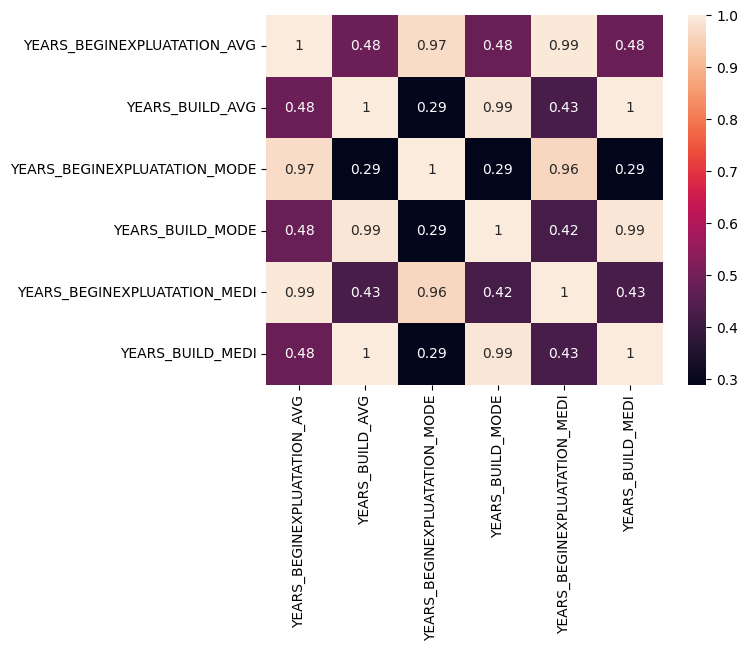

In [118]:
Years_exp=[i for i in df.columns if i.startswith('YEARS_') ]
sns.heatmap(df[Years_exp].corr(),annot=True)

# due to high correlation we are keepin one info 

df['HOUSE_LIVE']=0
for i in Years_exp:
    df['HOUSE_LIVE']+=df[i]

df.drop(Years_exp , inplace=True , axis=1)

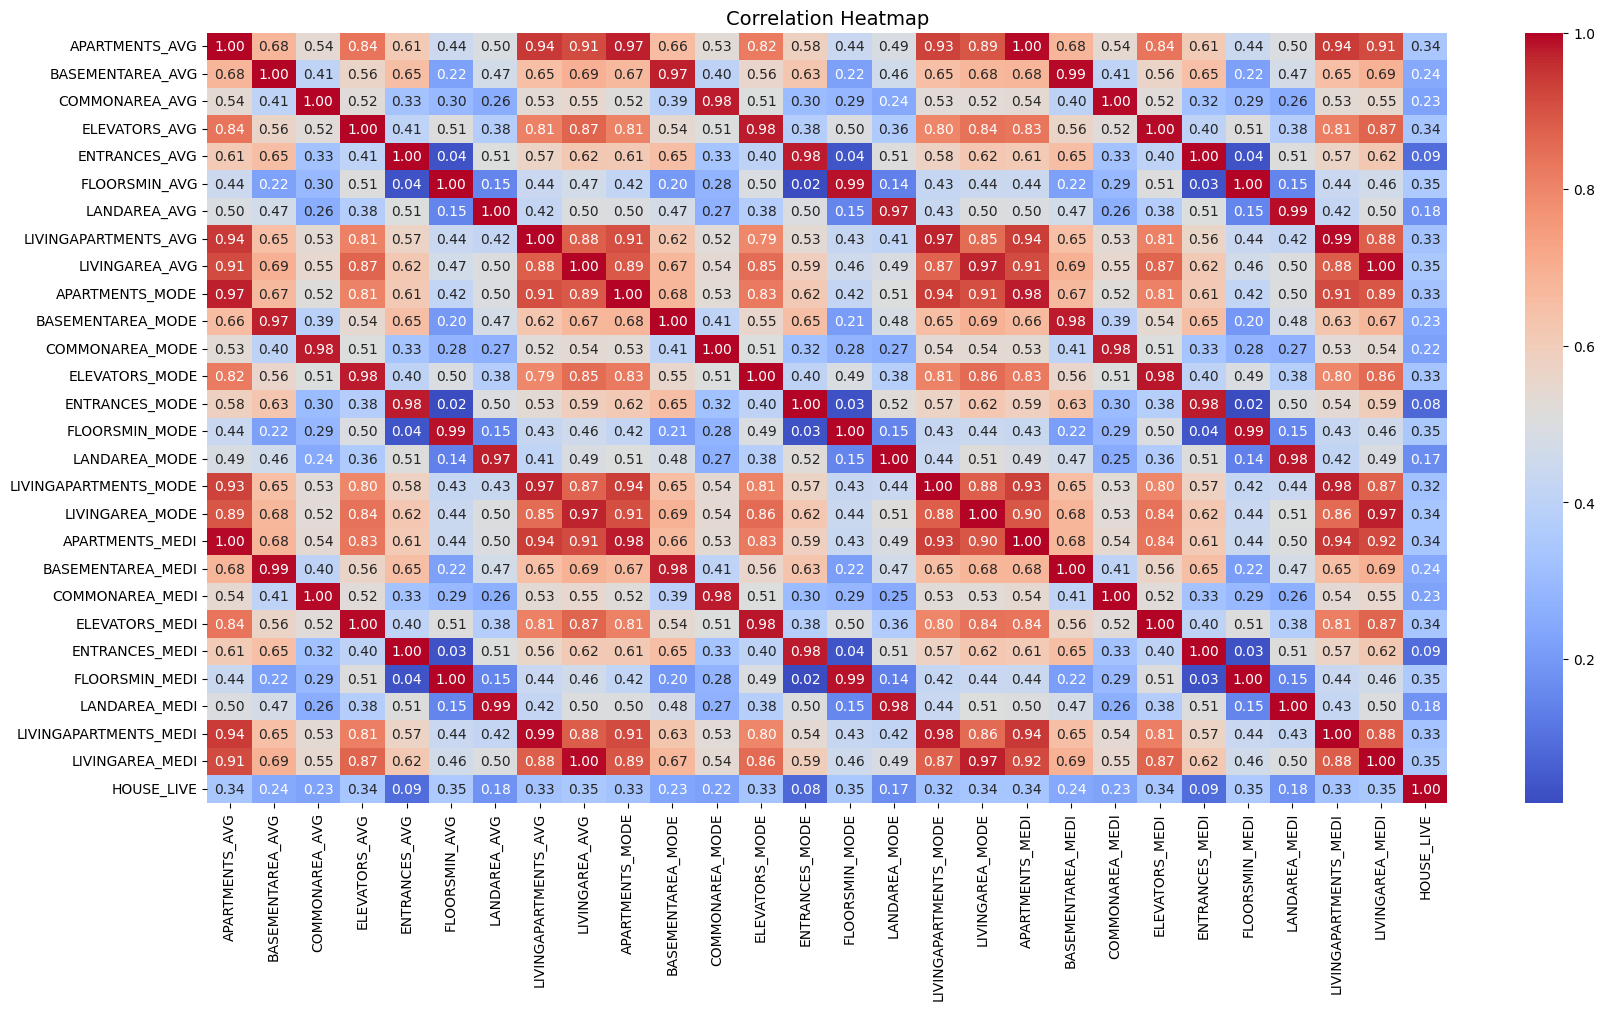

In [119]:

numerical_cols=[col for col in df.columns if df[col].dtypes!='O']

a=[cols for cols in numerical_cols if df[cols].isnull().sum()/df.shape[0]>.50 ]
nL=[col for col in a if col.startswith('NON')]
for i in nL:
    a.remove(i)
plt.figure(figsize=(20, 10))  # width=12, height=8 (adjust as needed)
corr = df[a[2:]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap", fontsize=14)
plt.show()
# evertying ar evry highy corelated creating one feature out of all of them 

df['COMBINE_BUILDING_AVG']=0
for i in a:
    df['COMBINE_BUILDING_AVG']+=df[i]

df.drop(columns=a , axis=1, inplace=True)

In [120]:
numerical_cols=[col for col in df.columns if df[col].dtype!='O']

# accept ext_1 and 
# own_car_age is not an imp factor ,Apartment avg also evrything indicate same info as per data given 
# merging all the colums and imputing with zero value and creating a flag 

In [123]:
df.drop('COMBINE_BUILDING_AVG' , inplace=True , axis=1)



In [122]:
numerical_cols=[col for col in df.columns if df[col].dtype!='O']
numerical_cols

df['EXT_SOURCE_1']=df1['EXT_SOURCE_1']

In [124]:
df['REGION_RATING_CLIENT'].value_counts()

REGION_RATING_CLIENT
2    226979
3     48329
1     32197
Name: count, dtype: int64

In [125]:
numerical_cols=[col for col in df.columns if df[col].dtype!='O']
numerical_cols

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ',
 'R_O_Def_OBS',
 'flag_R_O_Def_OBS',
 'Region_sum',
 'RlRAG',
 'loan/anual_salary',
 'flag_organization',
 'EXT_SOURCE_1']

0.4976114209525048
0.4976114209525048
0.4976114209525048
0.4826880863725793
0.0


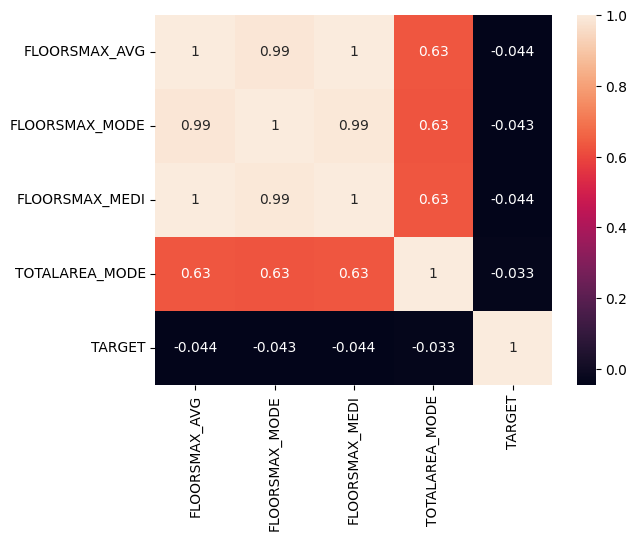

In [126]:
a=[ 'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'TARGET']



sns.heatmap(df[a].corr(), annot=True)
# there is very low  correl with the target so eitehr i can remove all the columns or make a single col form them 

# cheking percentage of null values

for i in a:
    print(df[i].isnull().sum()/df.shape[0])

# null values aroun 50% it would be literally noe use of keeping it 

df.drop(a , inplace=True ,axis=1)


# 

<Axes: >

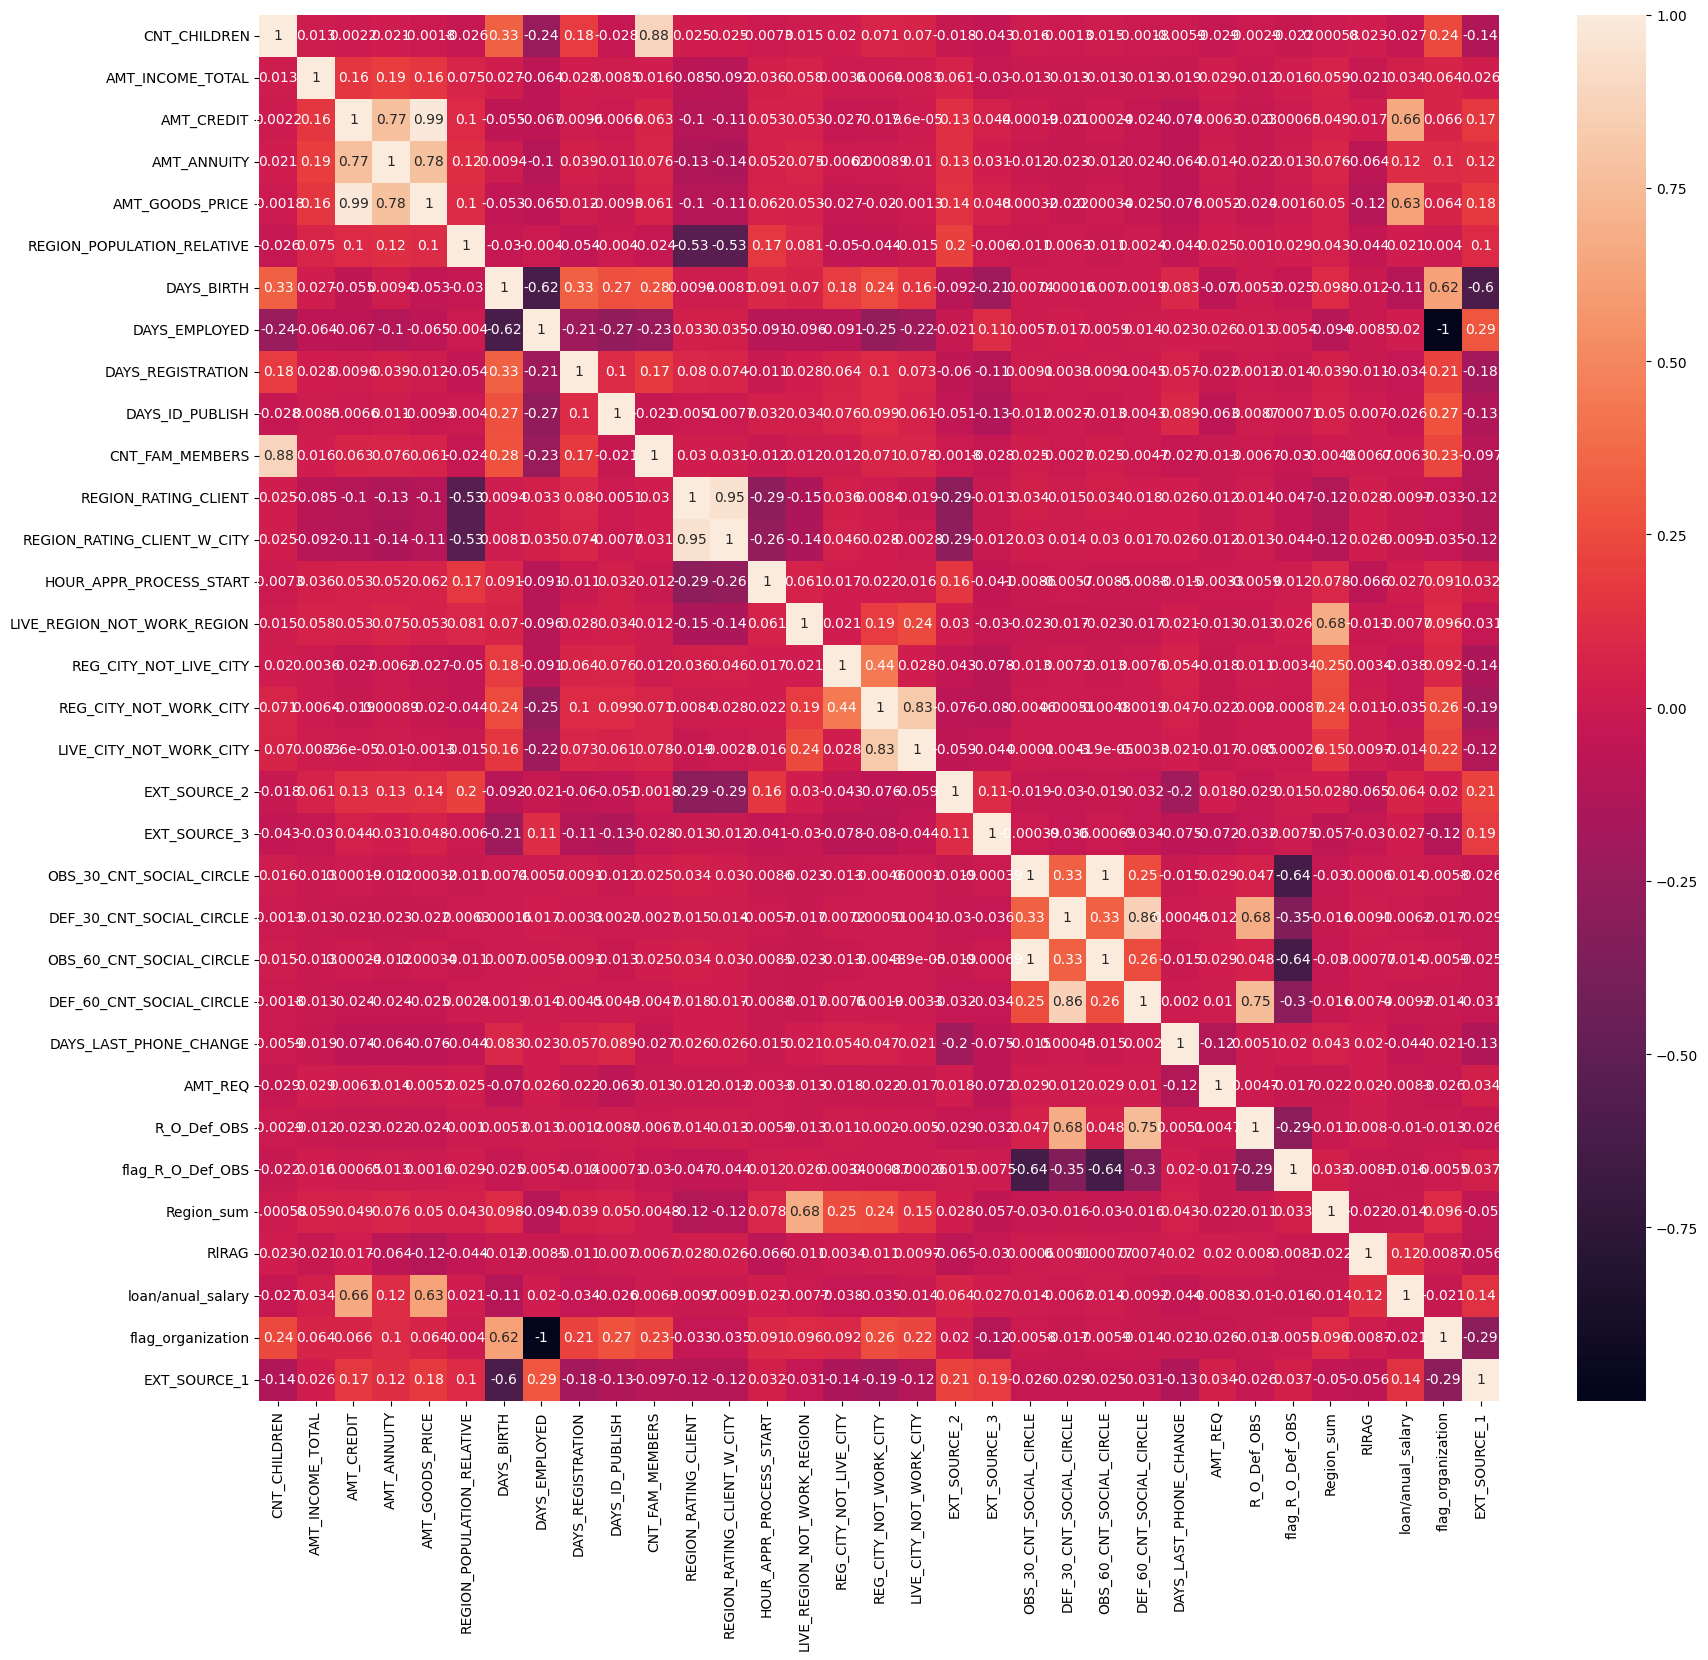

In [127]:
numerical_cols=[col for col in df.columns if df[col].dtype!='O']
numerical_cols
plt.figure(figsize=(20,18))
sns.heatmap(df[numerical_cols].corr(), annot=True)


In [128]:
numerical_cols=[col for col in  df.columns if df[col].dtypes !='O']

len(numerical_cols)

numerical_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ',
 'R_O_Def_OBS',
 'flag_R_O_Def_OBS',
 'Region_sum',
 'RlRAG',
 'loan/anual_salary',
 'flag_organization',
 'EXT_SOURCE_1']

In [129]:
df['age']=df['DAYS_BIRTH'].apply(lambda x : (-x)//365)

In [132]:
bins = [0, 20, 25, 30, 40, 100]  
labels = ["<20", "20-25", "25-30", "30-40", "40+"]

# Use pd.cut
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


df1=pd.read_csv('../artifacts/application_train.csv')
df['TARGET']=df1['TARGET']


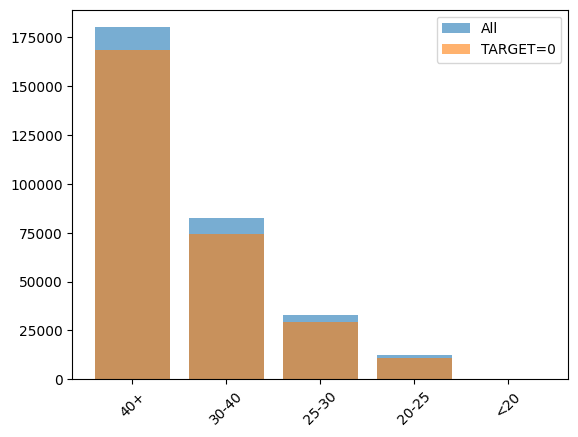

In [133]:


plt.bar(df['age_group'].value_counts().index.astype(str),
        df['age_group'].value_counts().values,
        alpha=0.6, label="All")

plt.bar(df.loc[df['TARGET']==0, 'age_group'].value_counts().index.astype(str),
        df.loc[df['TARGET']==0, 'age_group'].value_counts().values,
        alpha=0.6, label="TARGET=0")

plt.legend()
plt.xticks(rotation=45)
plt.show()


C:\Users\KADAK SINGH\AppData\Local\Temp\ipykernel_9892\2473859395.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_income = df.groupby('age_group')['AMT_INCOME_TOTAL'].mean()


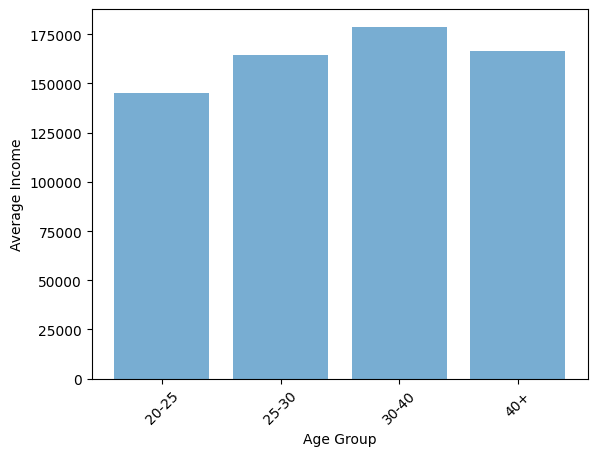

In [134]:


mean_income = df.groupby('age_group')['AMT_INCOME_TOTAL'].mean()

plt.bar(mean_income.index.astype(str), mean_income.values ,alpha=0.6)
plt.xlabel("Age Group")
plt.ylabel("Average Income")
plt.xticks(rotation=45)
plt.show()


In [135]:
df.drop('HOUR_APPR_PROCESS_START', inplace=True , axis=1)

In [67]:
df['defaulter_to_obs_ratio']=df['DEF_60_CNT_SOCIAL_CIRCLE']/df['OBS_30_CNT_SOCIAL_CIRCLE']
df['defaulter_to_obs_ratio'].fillna(0)
df['flag_for_Defaulter_ratio'] = [1 if i > 0 else 0 for i in df['defaulter_to_obs_ratio']]

# df.drop(circle , axis=1 , inplace=True)


In [140]:
numerical_cols=[col for col in df.columns if df[col].dtypes!='O']
numerical_cols


df.drop('age_group' , inplace=True , axis=1)

In [142]:
numerical_cols=[col for col in df.columns if df[col].dtypes!='O']



['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ',
 'R_O_Def_OBS',
 'flag_R_O_Def_OBS',
 'Region_sum',
 'RlRAG',
 'loan/anual_salary',
 'flag_organization',
 'EXT_SOURCE_1',
 'age',
 'TARGET']

In [146]:
df.drop(['DAYS_BIRTH','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE','CNT_CHILDREN'] , inplace=True , axis=1)

In [ ]:
df['DAYS_ID_PUBLISH']=df['DAYS_ID_PUBLISH'].apply(lambda x: -x/365)


In [ ]:

mapping = {
    'Family': 2,
    'Unaccompanied': 0,
    'Spouse, partner': 2,
    'Children': 2,
    'Other_A': 1,
    'Other_B': 1
}

df['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].map(mapping).fillna(0).astype(int)



In [176]:
categorical_cols=[col for col in df.columns if df[col].dtypes=='O']
df['NAME_INCOME_TYPE'].value_counts()


mapping_income = {
    'Working': 2,
    'Commercial associate': 2,
    'State servant': 2,
    'Businessman': 2,
    'Pensioner': 1,
    'Unemployed': 0,
    'Student': 0,
    'Maternity leave': 0
}
df['NAME_INCOME_TYPE'] = df1['NAME_INCOME_TYPE'].map(mapping_income).fillna(0).astype(int)

df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

mapping_occupation_skill_encoded = {
    'Managers': 2,
    'High skill tech staff': 2,
    'Accountants': 2,
    'Medicine staff': 2,
    'Secretaries': 2,
    'Realty agents': 2,
    'HR staff': 2,
    'IT staff': 2,
    'Core staff': 2,

    'Laborers': 1,
    'Sales staff': 1,
    'Drivers': 1,
    'Security staff': 1,
    'Cooking staff': 1,
    'Cleaning staff': 1,
    'Private service staff': 1,
    'Low-skill Laborers': 1,
    'Waiters/barmen staff': 1,

    'Unknown': 0
}
df['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].map(mapping_occupation_skill_encoded).fillna(0).astype(int)


df['NAME_FAMILY_STATUS'].value_counts()

mapping_family_status = {
    'Married': 1,  
    'Civil marriage': 1,
    'Separated': 0,
    'Single / not married': 0,
    'Widow': 0
}

df['NAME_FAMILY_STATUS'] = df1['NAME_FAMILY_STATUS'].map(mapping_family_status).fillna(0).astype(int)



df['NAME_EDUCATION_TYPE'].value_counts()

high_education_map={
    'Higher education': 2,
    'Secondary / secondary special': 1,
    'Incomplete higher': 1,
    'Lower secondary': 0
}

df['NAME_EDUCATION_TYPE'] = df1['NAME_EDUCATION_TYPE'].map(high_education_map).fillna(0).astype(int)

C:\Users\KADAK SINGH\AppData\Local\Temp\ipykernel_9892\1310806867.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


In [ ]:
categorical_data=[col for col in df.columns if df[col].dtype=="O"]
categorical_data

df['ORGANIZATION_TYPE'].value_counts()

mapping_org_encoded = {
    # Public Sector
    'Government': 3,
    'Military': 3,
    'Police': 3,
    'Postal': 3,
    'Security Ministries': 3,
    'Emergency': 3,
    'School': 3,
    'University': 3,
    'Kindergarten': 3,

    # Private Business / Corporate
    'Business Entity tier 2': 2,
    'Trade tier 1': 2,
    'Trade tier 2': 2,
    'Industry tier 1': 2,
    'Industry tier 2': 2,
    'Industry tier 3': 2,
    'Transport tier 2': 2,
    'Construction': 2,
    'Housing': 2,
    'Realtor': 2,
    'Services': 2,
    'Cleaning': 2,

    # Finance & Professional Services
    'Bank': 2,
    'Insurance': 2,
    'Legal Services': 2,
    'Advertising': 2,
    'Telecom': 2,
    'Electricity': 2,
    'Mobile': 2,

    # Healthcare & Education
    'Medicine': 1,
    'Restaurant': 1,
    'Hotel': 1,
    'Culture': 1,
    'Religion': 1,

    # Other
    'Self-employed': 1,
    'Other': 1,
    'XNA': 0
}
df['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].map(mapping_org_encoded).fillna(0).astype(int)



categorical_data=[col for col in df.columns if df[col].dtype=="O"]
df['NAME_CONTRACT_TYPE']

contract_map = {
    'Cash loans': 1,    
    'Revolving loans': 0
}
df['NAME_CONTRACT_TYPE'] = df1['NAME_CONTRACT_TYPE'].map(contract_map).fillna(0).astype(int)    \

df['NAME_HOUSING_TYPE'].value_counts()


housing_map = {
    'House / apartment': 2, 
    'With parents': 1,
    'Municipal apartment': 1,
    'Rented apartment': 0,
    'Office apartment': 0
}
df['NAME_HOUSING_TYPE'] = df1['NAME_HOUSING_TYPE'].map(housing_map).fillna(0).astype(int)


    

In [189]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier

# ----------------------
# Data Split
# ----------------------
categorical_data = [col for col in df.columns if df[col].dtype == "O"]
numerical_data = [col for col in df.columns if df[col].dtype != "O"]
numerical_data.remove("TARGET")

y = df["TARGET"]
X = df.drop("TARGET", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------
# Preprocessing
# ----------------------
num_transformer = SimpleImputer(strategy="median")
cat_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numerical_data),
        ("cat", cat_transformer, categorical_data),
    ]
)

# ----------------------
# Models Dictionary
# ----------------------
models = {
    "Logistic Regression": LogisticRegression(
        solver="liblinear", class_weight="balanced"
    ),
    # "SVM": SVC(kernel="rbf", class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=5, scale_pos_weight=5, random_state=42
    ),
    # "LightGBM": LGBMClassifier(
    #     n_estimators=200, learning_rate=0.1, max_depth=5, class_weight="balanced", random_state=42
    # ),
}

# ----------------------
# Training & Evaluation
# ----------------------
for name, model in models.items():
    print(f"\n==== {name} ====")

    pipeline = ImbPipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("smote", SMOTE(sampling_strategy=1, random_state=42)),
            ("model", model),
        ]
    )

    # Cross-validation
    scores = cross_val_score(
        pipeline, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
    )
    print("CV F1 scores:", scores)
    print("Mean CV F1:", scores.mean())

    # Train & evaluate on test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))



==== Logistic Regression ====
CV F1 scores: [0.18467767 0.18280395 0.18186512 0.18458052 0.17937034]
Mean CV F1: 0.18265952110152517
              precision    recall  f1-score   support

           0       0.94      0.61      0.74     84804
           1       0.11      0.57      0.19      7448

    accuracy                           0.60     92252
   macro avg       0.53      0.59      0.46     92252
weighted avg       0.87      0.60      0.69     92252


==== Random Forest ====
CV F1 scores: [0.00513845 0.00685323 0.00343446 0.00572738 0.00515169]
Mean CV F1: 0.005261040805100692
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84804
           1       0.45      0.00      0.01      7448

    accuracy                           0.92     92252
   macro avg       0.69      0.50      0.48     92252
weighted avg       0.88      0.92      0.88     92252


==== XGBoost ====
CV F1 scores: [0.30296542 0.30533188 0.30026281 0.29231933 0.292

In [ ]:
# re  eda and data preprocessing then going with selecting most import featres either by ,model selction or shap 
# trying the neural  network   for it if it performs keeping two model for interprtibilty and then good peformance 

# 3hr -4hrs 

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# Models with hyperparameters (including imbalance handling)
models = [
 

    {
        "name": "XGBoost",
        "model": XGBClassifier,
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5],
            "scale_pos_weight": [1, 5, 10]  # imbalance support
        }
    },
    # {
    #     "name": "LightGBM",
    #     "model": LGBMClassifier,
    #     "params": {
    #         "n_estimators": [100, 200],
    #         "learning_rate": [0.01, 0.1],
    #         "max_depth": [-1, 5, 10],
    #         "class_weight": ["balanced", None],  # imbalance support
    #         "scale_pos_weight": [1, 5, 10]       # alternative imbalance handling
    #     }
    # }
]


In [200]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline

for entry in models:
    print(f"\nTraining {entry['name']}...")

    # Wrap model in pipeline with preprocessor
    pipe = ImbPipeline([
        ("preprocessor", preprocessor),
        ("model", entry["model"]())
    ])

    grid = GridSearchCV(
        pipe,
        {"model__" + k: v for k, v in entry["params"].items()},
        cv=3,
        scoring=['recall', 'f1', 'precision'],
        refit='f1',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    print("Best Params:", grid.best_params_)
    print("Best Score:", grid.best_score_)






Training XGBoost...
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__scale_pos_weight': 5}
Best Score: 0.3043169964605723


In [199]:
# Use the same preprocessor as in your pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

X_gB_model = ImbPipeline([
	("preprocessor", preprocessor),
	("model", XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, scale_pos_weight=5, random_state=42))
])

X_gB_model.fit(X_train, y_train)
y_pred = X_gB_model.predict(X_test)
print(classification_report(y_test, y_pred))




# model save import joblib
import joblib
joblib.dump(X_gB_model, '../artifacts/final_model.pkl')
# model save



              precision    recall  f1-score   support

           0       0.94      0.91      0.93     84804
           1       0.26      0.37      0.31      7448

    accuracy                           0.87     92252
   macro avg       0.60      0.64      0.62     92252
weighted avg       0.89      0.87      0.88     92252



['../artifacts/final_model.pkl']

In [ ]:
import joblib
X_gB_model = joblib.load('../artifacts/final_model.pkl')

xgb_model = X_gB_model.named_steps['model']




(35, 36)